In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [4]:
raw_data = pd.read_csv("Datasets/daily-total-female-births-CA.csv")
raw_data

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
...,...,...
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55


In [5]:
df = raw_data.set_index("date")
df. index = pd.to_datetime(df.index)

In [6]:
df.head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [7]:
df.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


In [8]:
df = df.loc[df['births']>0]

In [9]:
print(np.isnan(df).any())
print(np.isinf(df).any())


births    False
dtype: bool
births    False
dtype: bool


In [10]:
df.shape

(365, 1)

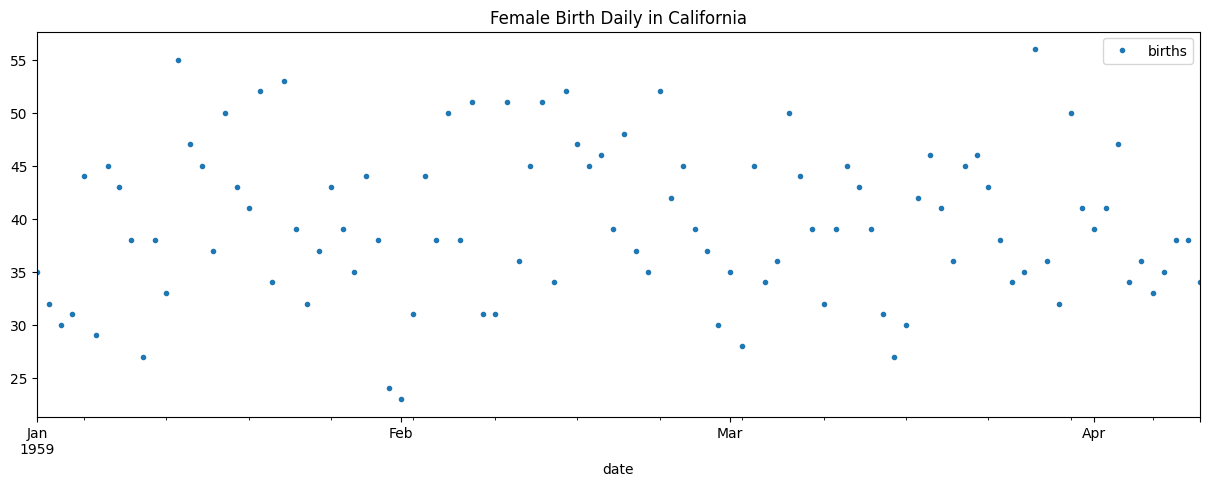

In [11]:

df[:100].plot(style='.', figsize = (15, 5), title = 'Female Birth Daily in California')
plt.show()

In [12]:
df = df[df['births'].notnull()]

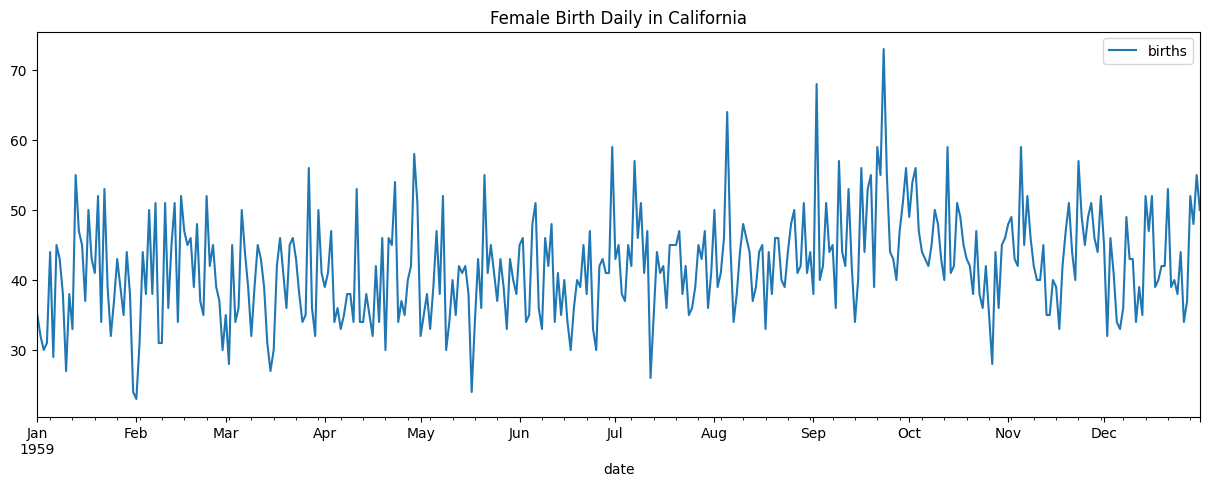

In [13]:
df.plot(figsize = (15, 5), title = 'Female Birth Daily in California')
plt.show()

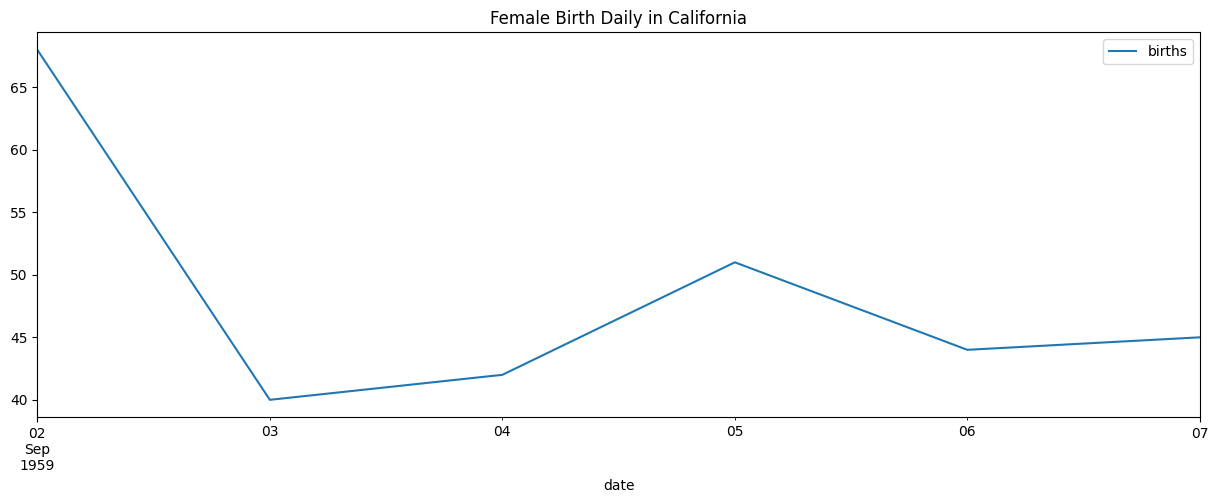

In [14]:
df.loc[(df.index> '09-01-1959') & (df.index < '09-08-1959')].plot(figsize = (15, 5), title = 'Female Birth Daily in California')
plt.show()

In [15]:
def feature_creation(df): 
    df['dayofweek'] = df.index.day_of_week
    df['dayofmonth'] = df.index.day
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['week'] = df.index.to_series().dt.day // 7 + 1
    return df

In [16]:
df.head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [17]:
df = feature_creation(df)

<Axes: xlabel='dayofmonth', ylabel='births'>

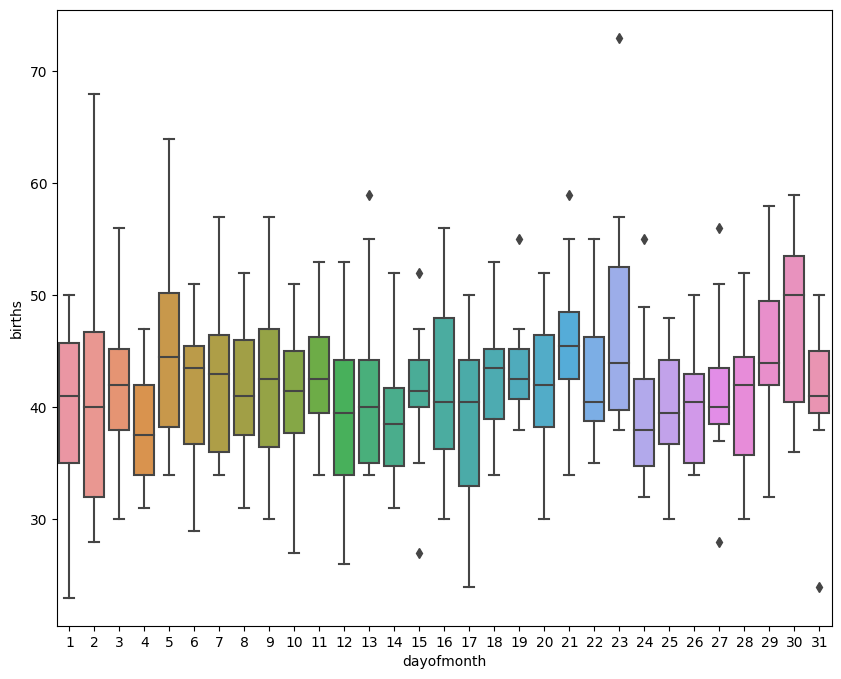

In [18]:
fig, ax = plt.subplots(figsize = (10,8))
sns.boxplot(data = df, x = 'dayofmonth', y = 'births')

<Axes: xlabel='dayofweek', ylabel='births'>

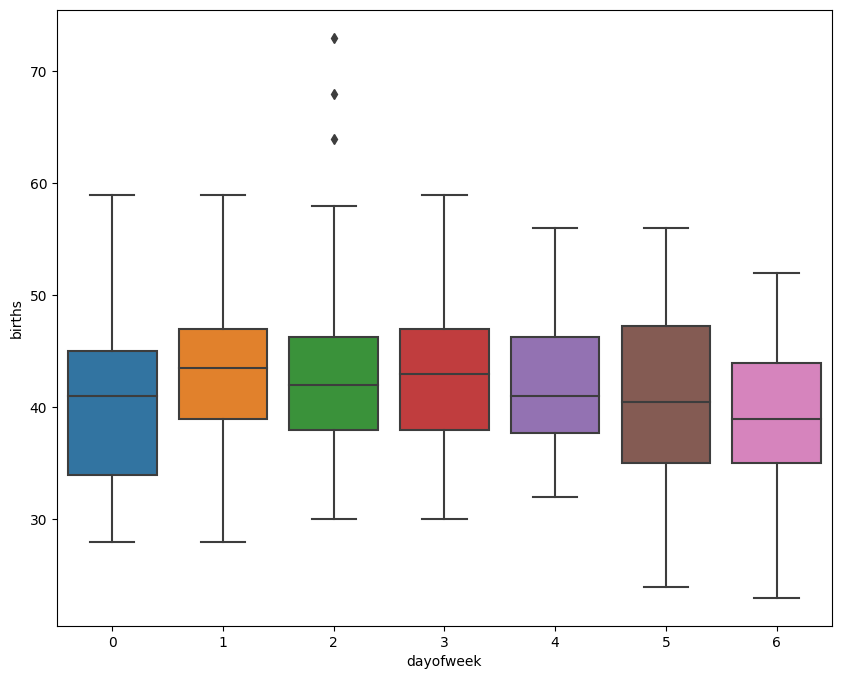

In [19]:
fig, ax = plt.subplots(figsize = (10,8))
sns.boxplot(data = df, x = 'dayofweek', y = 'births')

<Axes: xlabel='month', ylabel='births'>

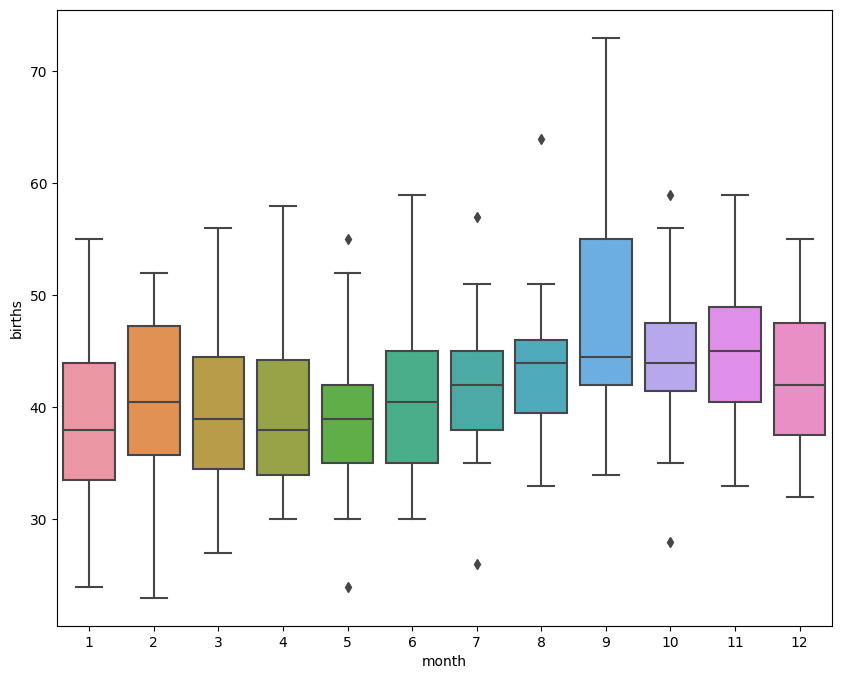

In [20]:
fig, ax = plt.subplots(figsize = (10,8))
sns.boxplot(data = df, x = 'month', y = 'births')

<Axes: xlabel='week', ylabel='births'>

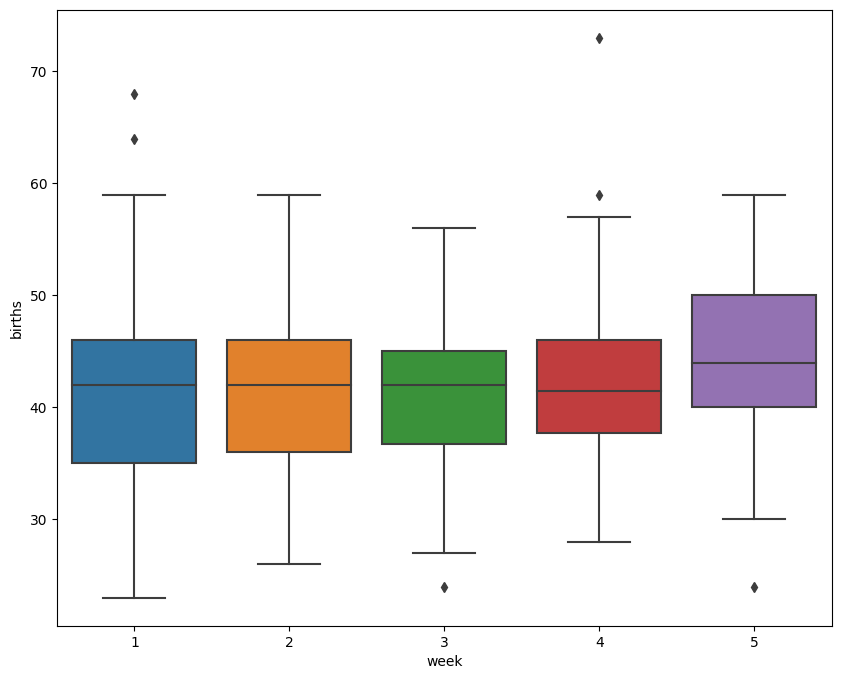

In [21]:
fig, ax = plt.subplots(figsize = (10,8))
sns.boxplot(data = df, x = 'week', y = 'births')

## CREATE our Model

### TRAIN/TEST Split

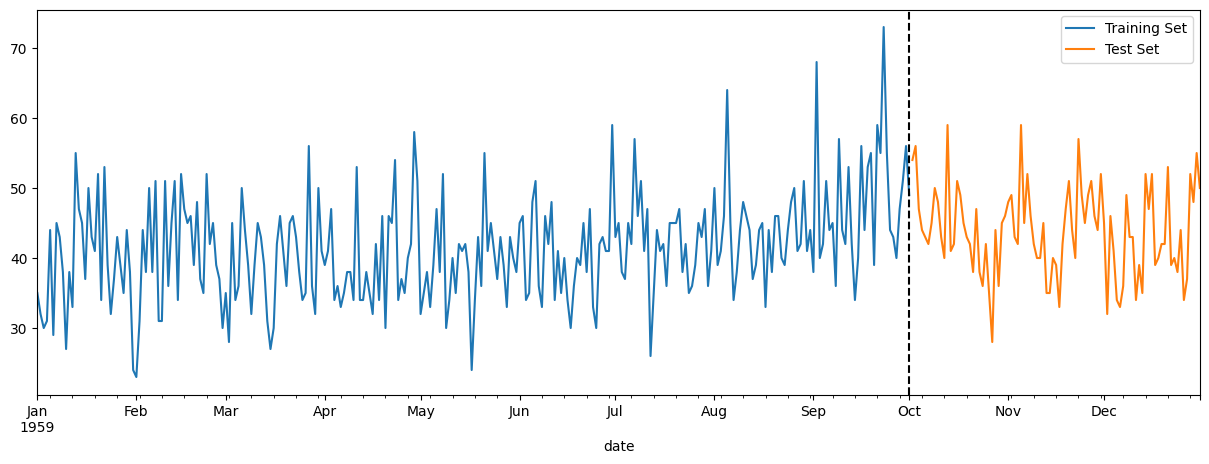

In [25]:
train = df.loc[df.index <= '10-01-1959']
test = df.loc[df.index > '10-01-1959']

fig, ax = plt.subplots(figsize = (15,5))
train['births'].plot(ax=ax, label = 'Training Set')
test['births'].plot(ax=ax, label = 'Test Set')
ax.axvline('10-01-1959', color = 'black', ls = '--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [26]:
train.columns

Index(['births', 'dayofweek', 'dayofmonth', 'quarter', 'month', 'year',
       'dayofyear', 'week'],
      dtype='object')

In [27]:
features = ['dayofmonth', 'dayofweek', 'quarter', 'month','week']
target = 'births'

In [28]:
X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

In [29]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(274, 5)
(274,)
(91, 5)
(91,)


In [30]:
reg = xgb.XGBRegressor(n_estimators = 1000, 
                       early_stopping_rounds = 50,
                       learning_rate = 0.01)
reg.fit(X_train, y_train, eval_set = [(X_train, y_train),
                                      (X_test, y_test)],
                                      verbose = True)

[0]	validation_0-rmse:41.17446	validation_1-rmse:43.33586
[1]	validation_0-rmse:40.77802	validation_1-rmse:42.93699
[2]	validation_0-rmse:40.38565	validation_1-rmse:42.54218
[3]	validation_0-rmse:39.99733	validation_1-rmse:42.15138
[4]	validation_0-rmse:39.61302	validation_1-rmse:41.76457
[5]	validation_0-rmse:39.23267	validation_1-rmse:41.38168
[6]	validation_0-rmse:38.85625	validation_1-rmse:41.00271
[7]	validation_0-rmse:38.48372	validation_1-rmse:40.62759
[8]	validation_0-rmse:38.11505	validation_1-rmse:40.25630
[9]	validation_0-rmse:37.75018	validation_1-rmse:39.84943
[10]	validation_0-rmse:37.38905	validation_1-rmse:39.44668
[11]	validation_0-rmse:37.03164	validation_1-rmse:39.04800
[12]	validation_0-rmse:36.67791	validation_1-rmse:38.65335
[13]	validation_0-rmse:36.32782	validation_1-rmse:38.26270
[14]	validation_0-rmse:35.98133	validation_1-rmse:37.87600
[15]	validation_0-rmse:35.63842	validation_1-rmse:37.49323
[16]	validation_0-rmse:35.29904	validation_1-rmse:37.11434
[17]	va

[45]	validation_0-rmse:26.85271	validation_1-rmse:27.56500
[46]	validation_0-rmse:26.60501	validation_1-rmse:27.27041
[47]	validation_0-rmse:26.35994	validation_1-rmse:27.00104
[48]	validation_0-rmse:26.11747	validation_1-rmse:26.71227
[49]	validation_0-rmse:25.87758	validation_1-rmse:26.44124
[50]	validation_0-rmse:25.64024	validation_1-rmse:26.15827
[51]	validation_0-rmse:25.40543	validation_1-rmse:25.89978
[52]	validation_0-rmse:25.17311	validation_1-rmse:25.62242
[53]	validation_0-rmse:24.94328	validation_1-rmse:25.34794
[54]	validation_0-rmse:24.71589	validation_1-rmse:25.09735
[55]	validation_0-rmse:24.49094	validation_1-rmse:24.82834
[56]	validation_0-rmse:24.26838	validation_1-rmse:24.58294
[57]	validation_0-rmse:24.04822	validation_1-rmse:24.31931
[58]	validation_0-rmse:23.83042	validation_1-rmse:24.05844
[59]	validation_0-rmse:23.61492	validation_1-rmse:23.82059
[60]	validation_0-rmse:23.40147	validation_1-rmse:23.56861
[61]	validation_0-rmse:23.19042	validation_1-rmse:23.329

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [31]:
pd.DataFrame(data=reg.feature_importances_,
             index = reg.feature_names_in_,
             columns=['importance']).sort_values(by=['importance'],ascending=False)

,importance
month,0.294456
dayofweek,0.250805
quarter,0.246288
dayofmonth,0.208450
week,0.000000


## Forecast on Test

In [32]:
test['prediction']=reg.predict(X_test)

C:\Users\sumit.bu.gupta\AppData\Local\Temp\ipykernel_1076\716901839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction']=reg.predict(X_test)


In [33]:
test.head()

,births,dayofweek,dayofmonth,quarter,month,year,dayofyear,week,prediction
date,,,,,,,,,
1959-10-02,54,4,2,4,10,1959,275,1,39.984177
1959-10-03,56,5,3,4,10,1959,276,1,41.666077
1959-10-04,47,6,4,4,10,1959,277,1,37.751450
1959-10-05,44,0,5,4,10,1959,278,1,37.190109
1959-10-06,43,1,6,4,10,1959,279,1,37.190109


In [34]:
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)


In [35]:
df.tail()

,births,dayofweek,dayofmonth,quarter,month,year,dayofyear,week,prediction
date,,,,,,,,,
1959-12-27,37,6,27,4,12,1959,361,4,36.605053
1959-12-28,52,0,28,4,12,1959,362,5,43.952263
1959-12-29,48,1,29,4,12,1959,363,5,43.952263
1959-12-30,55,2,30,4,12,1959,364,5,48.235580
1959-12-31,50,3,31,4,12,1959,365,5,40.694355


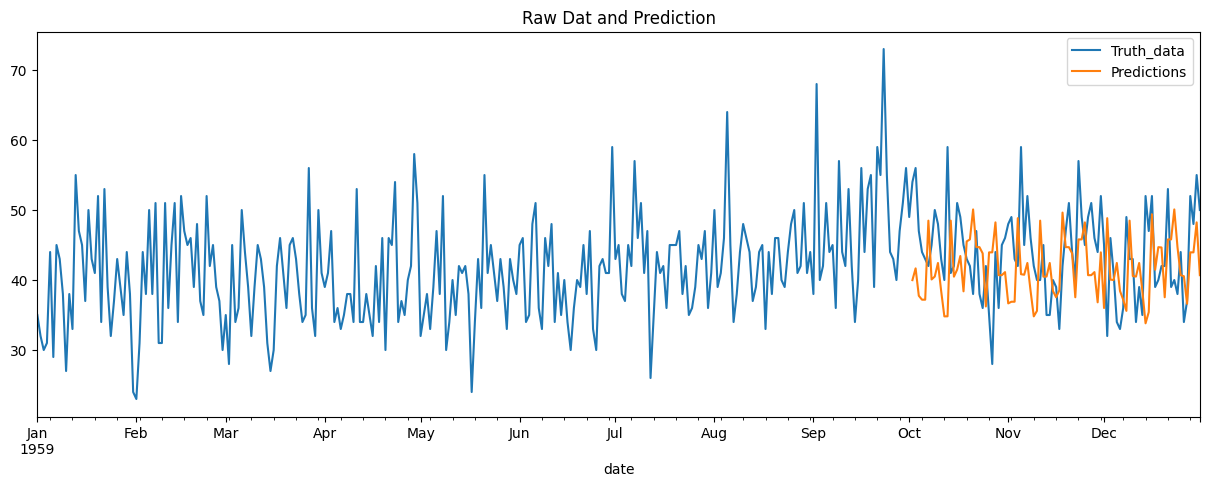

In [36]:
ax = df[['births']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax)
plt.legend(['Truth_data','Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

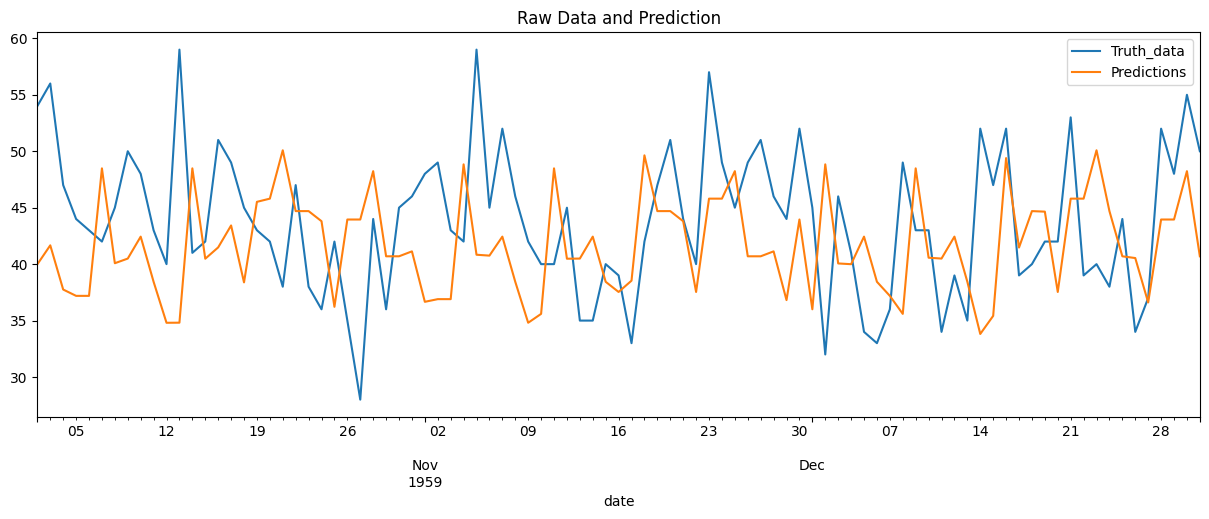

In [37]:
ax = df.loc[(df.index> '10-01-1959')]['births'].plot(figsize = (15, 5), title = 'Female Births in a day in California')
df.loc[(df.index> '10-01-1959')]['prediction'].plot(figsize = (15, 5), title = 'Female Births in a day in California')
plt.legend(['Truth_data','Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

In [38]:
df.columns

Index(['births', 'dayofweek', 'dayofmonth', 'quarter', 'month', 'year',
       'dayofyear', 'week', 'prediction'],
      dtype='object')

In [39]:
test_data = df.loc[df.index > '10-01-1959']["births"]
predicted_data = df.loc[df.index > '10-01-1959']["prediction"]

# Calculate mean squared error
mse = mean_squared_error(test_data, predicted_data)
mse

In [41]:
rmse = np.sqrt(mse)
rmse

8.033919636782109